In [1596]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


# 1. Discovery

The goal of this case study is to predict how likely a season ticket holder is to renew their subscription next season based on customer details, understand which features are the key in renewal decision and why some season ticket members aren’t renewing.
Output: Renewal (1,0)
Input: (All other features) Team performance,some customer characteristics related game attendance, renewal marketing, non-game events attendance, average price, seating section etc.

In this case study, I will discover how to perform feature selection with numerical and categorical input data for classification predictive modeling.

3 milestones of the project:
1. Data cleaning, data format correction(Renewal Data) for merging the datasets.
2. Feature Selection- How to evaluate the importance of numerical features using the ANOVA f-test and mutual information statistics. Chi- Squre for categorical variables, Correlation Matrix for numerical and other methods.
3. Model building- How to perform feature selection for data when fitting and evaluating a classification model.

# 2.Data Preparation and Initial Data Analysis (IDA)

## Upload all needed packages

In [1597]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sklearn.linear_model as skl_lm #for Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing

## Load Renewal and Customer Details datasets

In [1598]:
df1 = pd.read_csv('Renewal Details.csv', sep = ",")
df1.head()

,Customer_ID,Previous_Season,Renewal_Season,Renewal,Renewal_or_Non-renewal_Date,Average_Price_Paid_Per_Seat_Previous_Season,Total_Seats_Previous_Season,Team_Win_Pct_Previous_Season,Games_Attended_Previous_Season,Games_Missed_Previous_Season,Total_Games_Previous_Season,Non-Game_Events_Attended_Previous_Season,Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date,Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date,Emails_Sent_Last_90_Days_Before_Renewal_Date,Section_Previous_Season
0,262688,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,4-Sep-13,277.44,2,0.54,17,0,17,0,0,0,0,Reserved_Seats
1,262719,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,16-Jul-13,308.16,2,0.54,14,3,17,4,14,7,1,Reserved_Seats
2,262782,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,16-Jul-13,449.28,1,0.54,10,7,17,0,19,2,12,Reserved_Seats
3,263277,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,16-Jul-13,290.88,2,0.54,17,0,17,1,16,4,8,Reserved_Seats
4,263410,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,16-Jul-13,449.28,4,0.54,15,2,17,4,18,5,6,Reserved_Seats


In [1599]:
df2 = pd.read_csv('Customer Details.csv', sep = ",")
df2.head()

,Customer_ID,Renewal_or_Non-renewal_Date,Zip_Code_Distance_From_Stadium,Tenure_As_Season_Ticket_Member
0,262688,9/4/2013,37.556232,1
1,262688,8/4/2014,37.556232,2
2,262719,7/16/2013,15.340993,1
3,262719,8/4/2014,15.340993,2
4,262782,7/16/2013,21.569895,8


#### 'Renewal_or_Non-renewal_Date' is mutual column but it is in different format in both datasets.

In [1600]:
#For consistency, I will convert it to the same format in both pandas.
def convert_to_date(date_str):
    formats = ['%d-%b-%y', '%m-%d-%Y']
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt).strftime('%Y-%m-%d')
        except ValueError:
            pass
    return None

# Apply the custom function to the 'Renewal_or_Non-renewal_Date' to convert dates to a consistent format
df1['Renewal_or_Non-renewal_Date'] = df1['Renewal_or_Non-renewal_Date'].apply(convert_to_date)

#### As you can see in the first row, I converted 4-Sep-13 to 2013-09-04.

In [1601]:
df1.head()

,Customer_ID,Previous_Season,Renewal_Season,Renewal,Renewal_or_Non-renewal_Date,Average_Price_Paid_Per_Seat_Previous_Season,Total_Seats_Previous_Season,Team_Win_Pct_Previous_Season,Games_Attended_Previous_Season,Games_Missed_Previous_Season,Total_Games_Previous_Season,Non-Game_Events_Attended_Previous_Season,Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date,Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date,Emails_Sent_Last_90_Days_Before_Renewal_Date,Section_Previous_Season
0,262688,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-09-04,277.44,2,0.54,17,0,17,0,0,0,0,Reserved_Seats
1,262719,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-07-16,308.16,2,0.54,14,3,17,4,14,7,1,Reserved_Seats
2,262782,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-07-16,449.28,1,0.54,10,7,17,0,19,2,12,Reserved_Seats
3,263277,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-07-16,290.88,2,0.54,17,0,17,1,16,4,8,Reserved_Seats
4,263410,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-07-16,449.28,4,0.54,15,2,17,4,18,5,6,Reserved_Seats


#### Same date conversion for 'Customer Detail' dataset.

In [1602]:
# Convert the 'date' column to datetime
def convert_to_date(date_str):
    formats = ["%m/%d/%Y"]
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt).strftime('%Y-%m-%d')
        except ValueError:
            pass
    return None
# Apply the custom function to the 'Renewal_or_Non-renewal_Date' to convert dates to a consistent format
df2['Renewal_or_Non-renewal_Date'] = df2['Renewal_or_Non-renewal_Date'].apply(convert_to_date)

#### As you can see in the first row, the Renewal_or_Non-renewal_Date column 9/4/2013-> 2013-09-04.

In [1603]:
df2.head()

,Customer_ID,Renewal_or_Non-renewal_Date,Zip_Code_Distance_From_Stadium,Tenure_As_Season_Ticket_Member
0,262688,2013-09-04,37.556232,1
1,262688,2014-08-04,37.556232,2
2,262719,2013-07-16,15.340993,1
3,262719,2014-08-04,15.340993,2
4,262782,2013-07-16,21.569895,8


#### Merging 2 datasets on 'Customer_ID' and 'Renewal_or_Non-renewal_Date' columns.

In [1604]:
df = pd.merge(df1, df2, how='left',on=['Customer_ID','Renewal_or_Non-renewal_Date'])

In [1605]:
df.head()

,Customer_ID,Previous_Season,Renewal_Season,Renewal,Renewal_or_Non-renewal_Date,Average_Price_Paid_Per_Seat_Previous_Season,Total_Seats_Previous_Season,Team_Win_Pct_Previous_Season,Games_Attended_Previous_Season,Games_Missed_Previous_Season,Total_Games_Previous_Season,Non-Game_Events_Attended_Previous_Season,Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date,Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date,Emails_Sent_Last_90_Days_Before_Renewal_Date,Section_Previous_Season,Zip_Code_Distance_From_Stadium,Tenure_As_Season_Ticket_Member
0,262688,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-09-04,277.44,2,0.54,17,0,17,0,0,0,0,Reserved_Seats,37.556232,1
1,262719,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-07-16,308.16,2,0.54,14,3,17,4,14,7,1,Reserved_Seats,15.340993,1
2,262782,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-07-16,449.28,1,0.54,10,7,17,0,19,2,12,Reserved_Seats,21.569895,8
3,263277,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-07-16,290.88,2,0.54,17,0,17,1,16,4,8,Reserved_Seats,25.821965,4
4,263410,2012 Basketball Season Tickets,2013 Basketball Season Tickets,1,2013-07-16,449.28,4,0.54,15,2,17,4,18,5,6,Reserved_Seats,16.239354,2


#### First, I want to clean data by removing null values.

In [1606]:
#Length of dataframe before dropping nulls.
len(df)

3781

In [1607]:
df = df.dropna()

In [1608]:
#Length of dataframe after dropping nulls. 82 rows deleted.
len(df)

3699

Challenges: 
1. Discrepancies in formats such as Renewal_or_Non-renewal_Date attribute y,m,d order is different in 2 files. On the 
2. Some features are coded as numerical while they are actually categorical variables(Zip code) or vice versa.
3. Missing values, duplications, outliers.

Which additional data points I would add:
1. I would  keep zip code as categorical variable to see mostly in which area our fans live in rather than distance.
2. Response rate to the emails sent to customer in the last 90 days before renewal/non-renewal date.( Checking if the email is opened or not), 
3. The percantage of team winning on the games who the customer attends (not general team winning in the season)
4. Customer attendance in different times of the season for example how many games the customer attended in the first half and second half or if she/he attended playoffs, seasonality.
5. Duration of phone calls
6. The time passed until renewal after the last live phone conversation.
7. If the customer is using the app to follow the team updates, details or not(binary).
8. Seating is used by same people or resale option.
9. Gender,age etc.
10. If the email is customized or not- sending customized emails per each customer segmentation and response rate for these emails. Response rate to the customized emails.

# Model Planning and Exploratory Data Analysis (EDA)

## 1. Feature Selection Using Variance Threshold

In [1609]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
X = df[['Average_Price_Paid_Per_Seat_Previous_Season', 'Total_Seats_Previous_Season', 'Team_Win_Pct_Previous_Season', 'Games_Attended_Previous_Season', 'Games_Missed_Previous_Season', 
                        'Non-Game_Events_Attended_Previous_Season','Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date',
                        'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date','Emails_Sent_Last_90_Days_Before_Renewal_Date',
                        'Tenure_As_Season_Ticket_Member','Total_Games_Previous_Season','Zip_Code_Distance_From_Stadium']]
y = df['Renewal']

selector = VarianceThreshold(threshold=0.0025)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

#The function get_support can be used to generate the list of features that were kept.
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['Average_Price_Paid_Per_Seat_Previous_Season',
 'Total_Seats_Previous_Season',
 'Games_Attended_Previous_Season',
 'Games_Missed_Previous_Season',
 'Non-Game_Events_Attended_Previous_Season',
 'Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date',
 'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date',
 'Emails_Sent_Last_90_Days_Before_Renewal_Date',
 'Tenure_As_Season_Ticket_Member',
 'Zip_Code_Distance_From_Stadium']

#### 'Team_Win_Pct_Previous_Season' and 'Total_Games_Previous_Season' will not be used in the model since they have no impact on the final output.

#### I will use 3 different methods for feature selection and check the correlation between variables. As a result of these analysis, I will eliminate correlated variables in the model.

### For Numerical variables, Correlation Matrix.
### For Categorical variables, Chi Square Test.
### For Numerical and Categorical variables, ANOVA.

1. Correlation Matrix Method

In [1610]:
# I will put only numerical variables to correlation matrix then see the correlation of all columns.
df.dtypes

Customer_ID                                                                  int64
Previous_Season                                                             object
Renewal_Season                                                              object
Renewal                                                                      int64
Renewal_or_Non-renewal_Date                                                 object
Average_Price_Paid_Per_Seat_Previous_Season                                float64
Total_Seats_Previous_Season                                                  int64
Team_Win_Pct_Previous_Season                                               float64
Games_Attended_Previous_Season                                               int64
Games_Missed_Previous_Season                                                 int64
Total_Games_Previous_Season                                                  int64
Non-Game_Events_Attended_Previous_Season                                     int64
Phon

#### Numerical columns: 
#### 1. Average_Price_Paid_Per_Seat_Previous_Season
#### 2. Total_Seats_Previous_Season
#### 3. Team_Win_Pct_Previous_Season
#### 4. Games_Attended_Previous_Season
#### 5. Games_Missed_Previous_Season
#### 6. Total_Games_Previous_Season
#### 7.Non-Game_Events_Attended_Previous_Season
#### 8. Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date
#### 9. Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date
#### 10. Emails_Sent_Last_90_Days_Before_Renewal_Date
#### 11. Zip_Code_Distance_From_Stadium 
#### 12. Tenure_As_Season_Ticket_Member
    

#### Categorical Variables:
#### 1. Previous_Season
#### 2. Renewal_Season ( Previous season and renewal season is basically one way to another. So I will only use previous_season.
#### 3. Renewal_or_Non-renewal_Date-> I will extract month from date object and will make it categorical for this problem.*** I believe month information could be useful for this analysis. I do not extract year since it is already in season information.
#### 4 .Section_Previous_Season

## 1. Correlation Matrix

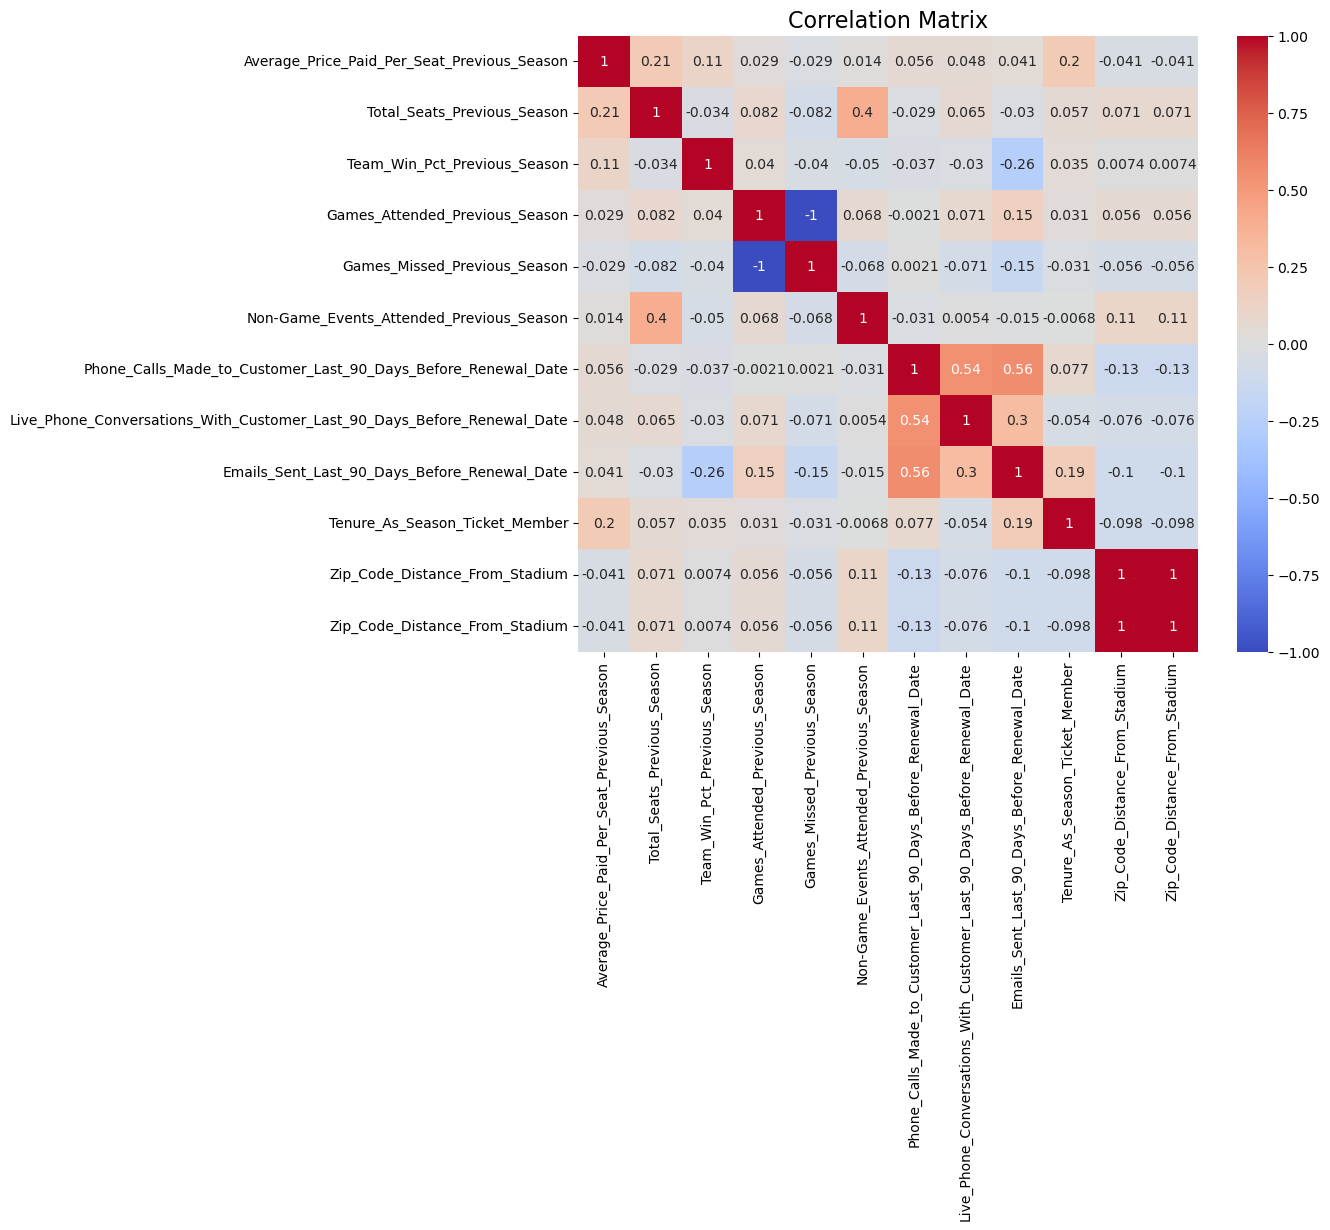

In [1611]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select the columns for the correlation matrix
df_corr = df[['Average_Price_Paid_Per_Seat_Previous_Season', 'Total_Seats_Previous_Season', 'Team_Win_Pct_Previous_Season', 'Games_Attended_Previous_Season', 'Games_Missed_Previous_Season', 
                        'Non-Game_Events_Attended_Previous_Season','Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date',
                        'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date','Emails_Sent_Last_90_Days_Before_Renewal_Date',
                        'Tenure_As_Season_Ticket_Member','Zip_Code_Distance_From_Stadium','Zip_Code_Distance_From_Stadium']]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

#### Variables should be correlated with the target but uncorrelated among themselves.

#### As we can see, Games_Attended_Previous_Season is negatively correlated to Games_Missed_Previous_Season. It was expected because if a person attends the games x times in a season, automatically # of missed games  is 17-x. So, I will eliminate  Games_Missed_Previous_Season in our analysis, keep  Games_Attended_Previous_Season variable for more accurate results.

#### I set 0.5 as threshold for feature elimination. When I look the correlation above 0.5, there are 2 correlations that caught on my eyes.

Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date ~ Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date  0.54 ( Positive Correlation)

Emails_Sent_Last_90_Days_Before_Renewal_Date ~ Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date 0.56

On other hand, Emails_Sent_Last_90_Days_Before_Renewal_Date ~ Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date has 0.3 correlation which is less than 0.5

In that case, I will eliminate 'Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date' variable.

As a last note, I was not expecting to see 0.4 correlation between Non-Game_Events_Attended_Previous_Season and Total_Seats_Previous_Season. Since it is under threshold, I will keep them but will check them in other analyses before the model.

## 2. Chi-square test

In [1612]:
#Converting 2 variables to the categorical
df['Previous_Season'] = df['Previous_Season'].astype('category',copy=False)
df['Renewal_Season'] = df['Renewal_Season'].astype('category',copy=False)

#### I will extract month info from date object which is another categorical variable. Then, I will add it to Chi square test to see the relationship between month and renewal(target).

In [1613]:
# Extract the month
# Convert the 'date' column to datetime
df['Renewal_or_Non-renewal_Date'] = pd.to_datetime(df['Renewal_or_Non-renewal_Date'], format='%Y-%m-%d', errors='coerce')
df['month'] = df['Renewal_or_Non-renewal_Date'].dt.month

In [1614]:
df['month'] = df['month'].astype('category',copy=False)

In [1615]:
chisqt2 = pd.crosstab(df.Renewal, df.month, margins=True)
chisqt2

month,1,2,3,7,8,9,10,11,12,All
Renewal,,,,,,,,,,
0,0,0,475,0,0,0,0,0,0,475
1,23,26,21,1094,1510,83,294,120,53,3224
All,23,26,496,1094,1510,83,294,120,53,3699


In [1616]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt2.iloc[0][0:5].values,
                  chisqt2.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(2991.9920885407864, 0.0, 4)


#### Statistical value=2991.9920885407864    P_value=0.0       Degree of freedom=4

#### Null hypothesis: No relationship between renewal decision and month
Based on p value (p<0.05), reject null hypothesis and we can say there is a correlation between Renewal(target) and month. I will keep month in the analysis. We want no correlation between independent variables. On the other hand, we want relationship between X's and Y(target).

In [1617]:
chisqt3 = pd.crosstab(df.Renewal_Season, df.Previous_Season, margins=True)
chisqt3

Previous_Season,2012 Basketball Season Tickets,2013 Basketball Season Tickets,All
Renewal_Season,,,
2013 Basketball Season Tickets,1543,0,1543
2014 Basketball Season Tickets,0,2156,2156
All,1543,2156,3699


In [1618]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt3.iloc[0][0:5].values,
                  chisqt3.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(3698.9999999999995, 0.0, 2)


#### There is a correlation between previous season and renewal season variables, so we do not need to keep them both. I will eliminate previous season.

### So far, we eliminated 'Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date' and  'Games_Missed_Previous_Season' variables as a result of correlation matrix, 'previous_season' from Chi square test.

## 3. Anova 

#### One-way ANOVA
#### Numerical:Average_Price_Paid_Per_Seat_Previous_Season   Categorical: Section_Previous_Season  

First, I want to show the distribution of average price by section previous season in bar chat to get a first insight if mean price for each section is equal or not. Anova null hypothesis says that there is no difference among group means.

<Axes: xlabel='Section_Previous_Season'>

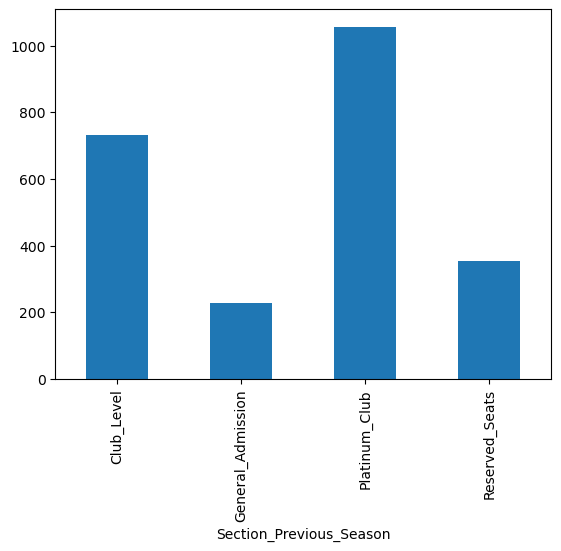

In [1619]:
import matplotlib.pyplot as plt
df.groupby('Section_Previous_Season')['Average_Price_Paid_Per_Seat_Previous_Season'].mean().plot(kind='bar')

As we can see, the platinum club ticket is the most expensive one while the general admission tickets are the least. Means do not look like equal.

Null hypothesis:There is no difference among group means of price by Section_Previous_Season.

I will create a new dataframe to use in ANOVA test sampling.

In [1620]:
anova_df=pd.DataFrame({'Club_Level':df[df['Section_Previous_Season']=='Club_Level']['Average_Price_Paid_Per_Seat_Previous_Season'],
                 'General_Admission':df[df['Section_Previous_Season']=='General_Admission']['Average_Price_Paid_Per_Seat_Previous_Season'],
                 'Platinum_Club':df[df['Section_Previous_Season']=='Platinum_Club']['Average_Price_Paid_Per_Seat_Previous_Season'],
                 'Reserved_Seats':df[df['Section_Previous_Season']=='Reserved_Seats']['Average_Price_Paid_Per_Seat_Previous_Season']})

In [1621]:
anova_df.head()

,Club_Level,General_Admission,Platinum_Club,Reserved_Seats
0,NaN,NaN,NaN,277.44
1,NaN,NaN,NaN,308.16
2,NaN,NaN,NaN,449.28
3,NaN,NaN,NaN,290.88
4,NaN,NaN,NaN,449.28


In [1622]:
anova_df.describe() 

,Club_Level,General_Admission,Platinum_Club,Reserved_Seats
count,123.000000,774.000000,69.000000,2733.000000
mean,730.570833,228.035919,1056.182725,355.254809
std,129.615239,22.943420,129.711914,111.039882
min,236.640000,103.680000,326.400000,94.656000
25%,634.560000,220.320000,1020.000000,285.600000
50%,775.200000,220.320000,1071.360000,375.360000
75%,816.000000,233.280000,1109.760000,445.200000
max,950.400000,356.400000,1261.440000,654.240000


One of the ANOVA assumptions is that samples should be randomly selected and should be close to Normal Distribution. Let's take the samples first.

If we have 2-9 groups, the sample size for each group should be at least 15. If we have 10-12 groups, the sample size for each group should be at least 20. So, we set 15 as sample size since we have 4 groups.

In [1623]:
np.random.seed(1234)
sample_df=pd.DataFrame({'Club_Level':random.sample(list(df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season']=='Club_Level']), 15),
'General_Admission':random.sample(list(df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season']=='General_Admission']), 15),
'Platinum_Club':random.sample(list(df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season']=='Platinum_Club']), 15),
'Reserved_Seats':random.sample(list(df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season']=='Reserved_Seats']), 15)})

In [1624]:
sample_df.head()

,Club_Level,General_Admission,Platinum_Club,Reserved_Seats
0,845.76,256.3200,1207.68,252.00
1,705.60,220.3200,1175.04,382.08
2,659.52,226.5408,990.00,465.12
3,775.20,259.2000,960.00,432.48
4,812.16,220.3200,1071.36,432.48


In [1625]:
anova_df

,Club_Level,General_Admission,Platinum_Club,Reserved_Seats
0,NaN,NaN,NaN,277.44
1,NaN,NaN,NaN,308.16
2,NaN,NaN,NaN,449.28
3,NaN,NaN,NaN,290.88
4,NaN,NaN,NaN,449.28
...,...,...,...,...
3776,NaN,NaN,NaN,285.60
3777,NaN,NaN,NaN,478.80
3778,NaN,NaN,NaN,350.88
3779,NaN,220.32,NaN,NaN


In [1626]:
anova_df1=anova_df.copy()
anova_df2=anova_df.copy()
anova_df3=anova_df.copy()
anova_df4=anova_df.copy()

In [1627]:
anova_df1.dropna(subset=['Club_Level'], inplace=True) # Removing null values for each category.
anova_df2.dropna(subset=['General_Admission'], inplace=True)
anova_df3.dropna(subset=['Platinum_Club'], inplace=True)
anova_df4.dropna(subset=['Reserved_Seats'], inplace=True)

In [1628]:
anova_df4 # As you can see, anova_df1 only includes non-null values in Reserved_Seats column.

,Club_Level,General_Admission,Platinum_Club,Reserved_Seats
0,NaN,NaN,NaN,277.44
1,NaN,NaN,NaN,308.16
2,NaN,NaN,NaN,449.28
3,NaN,NaN,NaN,290.88
4,NaN,NaN,NaN,449.28
...,...,...,...,...
3775,NaN,NaN,NaN,350.88
3776,NaN,NaN,NaN,285.60
3777,NaN,NaN,NaN,478.80
3778,NaN,NaN,NaN,350.88


In [1629]:
# Let's normalize each group. There are many methods, log, square root transformation etc. I will use log transformation.

Text(0.5, 1.0, 'Log-Transformed Data')

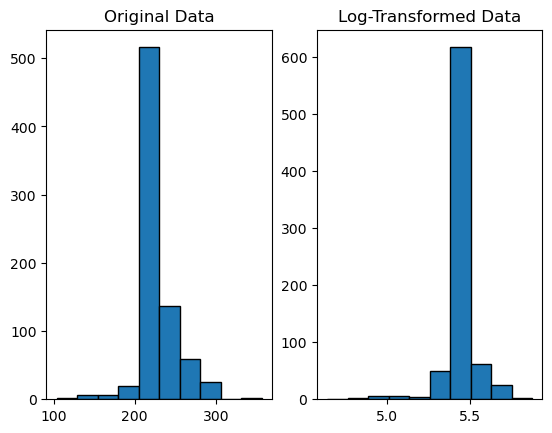

In [1630]:
import numpy as np
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(0)

#create log-transformed data
data_log1 = np.log(anova_df1['Club_Level'])
data_log2 = np.log(anova_df2['General_Admission'])
data_log3 = np.log(anova_df3['Platinum_Club'])
data_log4 = np.log(anova_df4['Reserved_Seats'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histogram only for Club Level
axs[0].hist(anova_df2['General_Admission'], edgecolor='black')
axs[1].hist(data_log2, edgecolor='black')

#add title to the histograms of original and normalized data
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

As you can see, we bring the data close to normal distribution. Now, we can take samples from each category(normalized version of each category).

In [1631]:
np.random.seed(1234)
sample_df=pd.DataFrame({'Club_Level':random.sample(list(data_log1), 15),
'General_Admission':random.sample(list(data_log2), 15),
'Platinum_Club':random.sample(list(data_log3), 15),
'Reserved_Seats':random.sample(list(data_log4), 15)})

In [1632]:
sample_df.head()

,Club_Level,General_Admission,Platinum_Club,Reserved_Seats
0,6.468692,5.395081,7.054242,6.126694
1,6.653121,5.395081,6.956545,6.159687
2,6.653121,5.395081,6.976684,6.069536
3,6.490056,5.395081,6.927558,5.622138
4,6.403309,5.484551,6.857556,5.894072


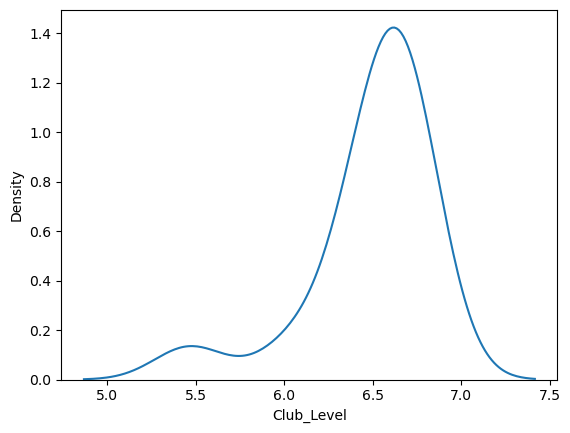

In [1633]:
sns.kdeplot(data = sample_df['Club_Level'])  # The distribution of sample is close to Normal distribution. 
plt.show()

#### Performing the ANOVA

In [1634]:
F, p = stats.f_oneway(sample_df['Club_Level'],sample_df['General_Admission'],sample_df['Platinum_Club'],sample_df['Reserved_Seats'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=57.309, p=0.000


P value is less than 0.05 which is indicating that there is an overall significant effect of Section_Previous_Season on price. However, we don’t know where the difference between Section_Previous_Season is yet. I will perform post-hoc tests to determine exactly which groups differ from each other(Tukey HDS test). At that step, I tend to eliminate Section_Previous_Season and keep price in the model since they are related. But first, I need to validate the assumptions.

#### Another way to look p value.

In [1635]:
model = ols('Average_Price_Paid_Per_Seat_Previous_Season ~ C(Section_Previous_Season)', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Average_Price_Paid_Per_Seat_Previous_Season   R-squared:                       0.631
Model:                                                     OLS   Adj. R-squared:                  0.631
Method:                                          Least Squares   F-statistic:                     2106.
Date:                                         Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                                                 11:29:23   Log-Likelihood:                -22298.
No. Observations:                                         3699   AIC:                         4.460e+04
Df Residuals:                                             3695   BIC:                         4.463e+04
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                         730.5708      9.058     80.659      0.000     712.812     748.329
C(Section_Previous_Season)[T.General_Admission]  -502.5349      9.751    -51.538      0.000    -521.652    -483.418
C(Section_Previous_Season)[T.Platinum_Club]       325.6119     15.109     21.551      0.000     295.989     355.235
C(Section_Previous_Season)[T.Reserved_Seats]     -375.3160      9.259    -40.535      0.000    -393.470    -357.162
==============================================================================
Omnibus:                      690.716   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1306.075
Skew:                          -1.144   Prob(JB):                    2.45e-284
Kurtosis:                       4.799   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### p < 0.05, It suppports the previous findings.

# Tukey HSD test

In [1636]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['Average_Price_Paid_Per_Seat_Previous_Season'], df['Section_Previous_Season'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Club_Level,General_Admission,-502.5349,0.0,-527.5963,-477.4735,True
Club_Level,Platinum_Club,325.6119,0.0,286.7785,364.4453,True
Club_Level,Reserved_Seats,-375.316,0.0,-399.1139,-351.5181,True
General_Admission,Platinum_Club,828.1468,0.0,795.7091,860.5845,True
General_Admission,Reserved_Seats,127.2189,0.0,116.7063,137.7315,True
Platinum_Club,Reserved_Seats,-700.9279,0.0,-732.3997,-669.4561,True


## Assumption Checks/Model Diagnostics
## Normal Distribution Assumption check

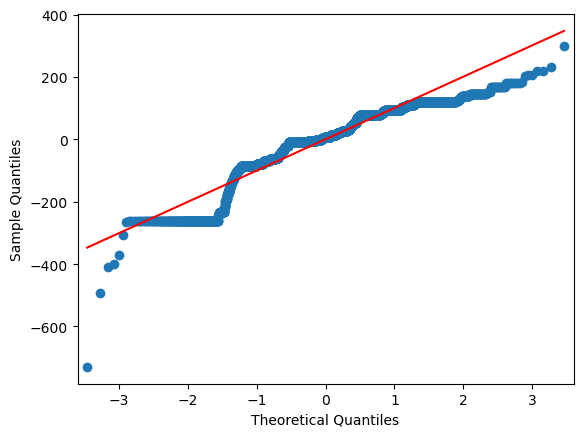

In [1637]:
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

In [1638]:
#import scipy.stats as stats

#stats.shapiro(model.resid)

## INDEPENDENCE

What this means is that all groups are mutually exclusive, i.e. an individual can only belong in one group.- Correct in our case.

## HOMOGENEITY OF VARIANCE

In [1639]:
stats.levene(df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season'] == 'Club_Level'],
             df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season'] == 'General_Admission'],
             df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season'] == 'Platinum_Club'],
            df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season'] == 'Reserved_Seats'])

LeveneResult(statistic=256.11431870782127, pvalue=5.305200869887599e-151)

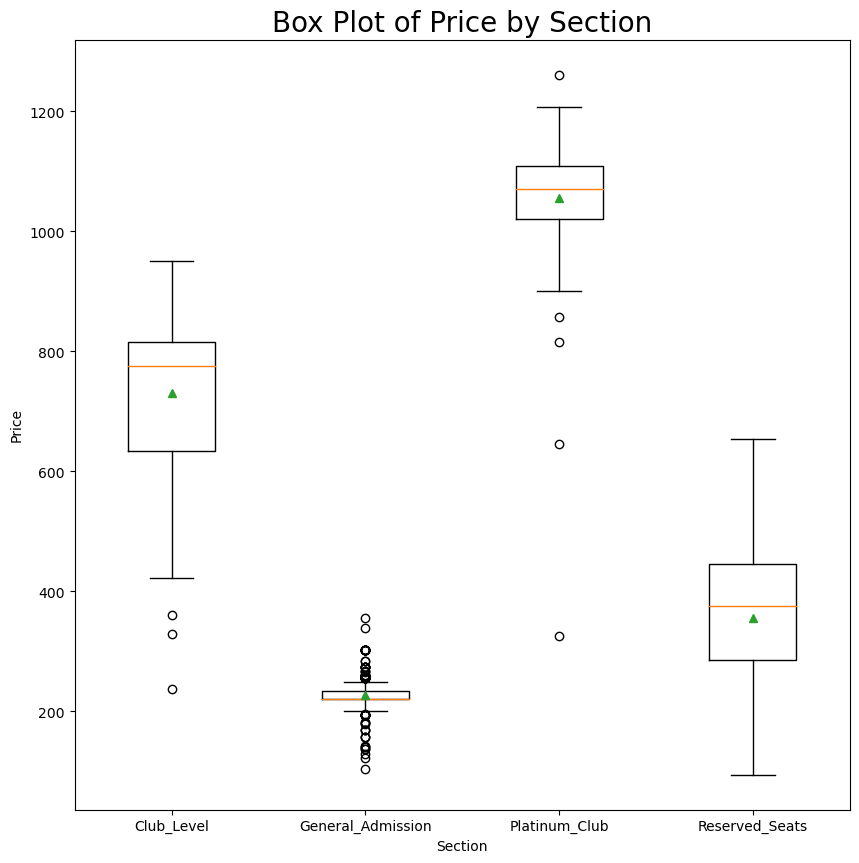

In [1640]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Price by Section", fontsize= 20)
ax.set

data = [df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season'] == 'Club_Level'],
             df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season'] == 'General_Admission'],
             df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season'] == 'Platinum_Club'],
            df['Average_Price_Paid_Per_Seat_Previous_Season'][df['Section_Previous_Season'] == 'Reserved_Seats']]
ax.boxplot(data,
           labels= ['Club_Level', 'General_Admission', 'Platinum_Club','Reserved_Seats'],
           showmeans= True)

plt.xlabel("Section")
plt.ylabel("Price")

plt.show()

#### The results of the analysis may be incorrect or misleading(Since one of the one-way ANOVA test assumptions(HOMOGENEITY OF VARIANCE) is not met), but I believe that there is a relationship between average price and section_previous season. Therefore, I will double check if both is needed in the next analysis which is FEATURE IMPORTANCE.

After 3 analysis, we eliminated So far, we eliminated 'Phone_Calls_Made_to_Customer_Last_90_Days_Before_Renewal_Date' and 'Games_Missed_Previous_Season' variables as a result of correlation matrix and 'Previous_Season' variable after Chi Square Test.¶

# Model Building 

I will be using Extra Tree Classifier for extracting the top features for the dataset.

ExtraTreesClassifier is a machine learning algorithm that uses decision trees for classification. It inherently incorporates a form of feature importance based on the contribution of each feature to the model's predictive performance.

In [1641]:
# Categorical variables added to classifier after encoding

In [1642]:
df.dtypes

Customer_ID                                                                         int64
Previous_Season                                                                  category
Renewal_Season                                                                   category
Renewal                                                                             int64
Renewal_or_Non-renewal_Date                                                datetime64[ns]
Average_Price_Paid_Per_Seat_Previous_Season                                       float64
Total_Seats_Previous_Season                                                         int64
Team_Win_Pct_Previous_Season                                                      float64
Games_Attended_Previous_Season                                                      int64
Games_Missed_Previous_Season                                                        int64
Total_Games_Previous_Season                                                         int64
Non-Game_E

[1.75377393e-02 3.50340172e-03 2.17601297e-02 3.53890132e-03
 1.56372080e-02 8.54854850e-02 1.51036590e-02 6.70648128e-03
 2.23744189e-04 1.40848024e-03 4.74806861e-04 9.54418239e-04
 1.18173854e-03 1.61008676e-03 6.49580913e-01 5.78110061e-02
 7.21018508e-02 5.25371443e-03 2.84358366e-02 7.69765320e-03
 3.99274587e-03]


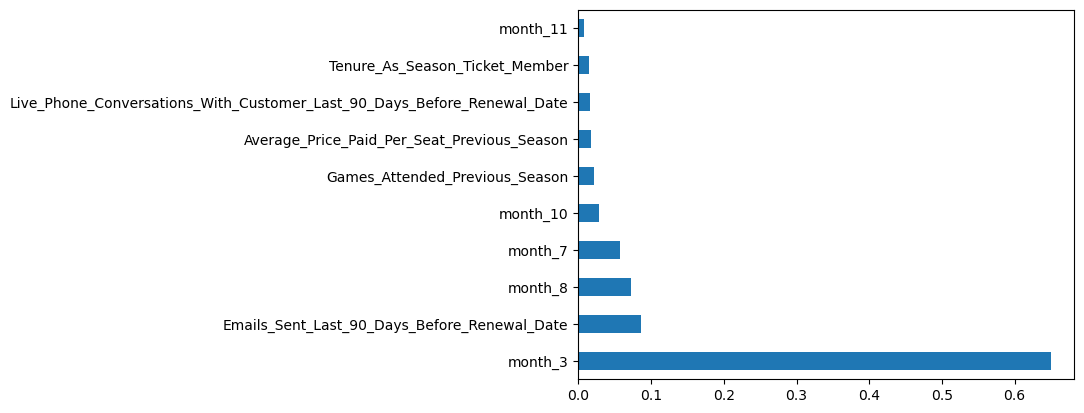

In [1643]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Assuming 'SECTION' and 'MONTH' are categorical columns in your DataFrame
# If not, replace them with the actual column names of your categorical variables
X = df[['Average_Price_Paid_Per_Seat_Previous_Season', 'Total_Seats_Previous_Season', 'Games_Attended_Previous_Season', 
        'Non-Game_Events_Attended_Previous_Season',
        'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date','Emails_Sent_Last_90_Days_Before_Renewal_Date',
        'Tenure_As_Season_Ticket_Member','Section_Previous_Season','month','Zip_Code_Distance_From_Stadium']]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=[ 'Section_Previous_Season','month'])

# Target column
y = df['Renewal']

# Initialize and fit the Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X_encoded, y)

# Print feature importances
print(model.feature_importances_)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

As we can see, the 3 most important features are 
1. months(Month 3,8 and month 7 are critical.)
2. Emails sent to customer in the last 90 days before renewal/non-renewal date.
3. Games_Attended_Previous_Season

On the other hand, we can see that Average price per seat and Live phone conversations had with customer in the last 90 days before their renewal /non-renewal date is also somehow important.

We don't see section_previous_season variable in the top 10. I believe since it is corelated to price(we tested in ANOVA), it is not a surprise not to see it in this graph.

More importantly,we should focus on why month_3 and Emails_sent_last_90_days_before_renewal_date is critical for our model.

# Univariate Selection

I will use SelectKBest that is a feature selection technique in scikit-learn that selects the top k features based on a specified scoring function (e.g., chi-squared test for categorical data, ANOVA for numerical data)

with ExtraTreesClassifier machine learning model.

If the number of predictors is large,we can use both in conjunction to improve the efficiency and interpretability of our model. For example, I will use SelectKBest to pre-select a subset of the most important features and then train an ExtraTreesClassifier on that reduced set of features.

Selected Features: Index(['Average_Price_Paid_Per_Seat_Previous_Season',
       'Games_Attended_Previous_Season',
       'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date',
       'Emails_Sent_Last_90_Days_Before_Renewal_Date',
       'Tenure_As_Season_Ticket_Member', 'month_3', 'month_7', 'month_8',
       'month_10', 'month_11'],
      dtype='object')
Feature Importances: [0.02148912 0.01899822 0.02023972 0.10353876 0.0093018  0.63617732
 0.06772518 0.07900916 0.03600407 0.00751667]


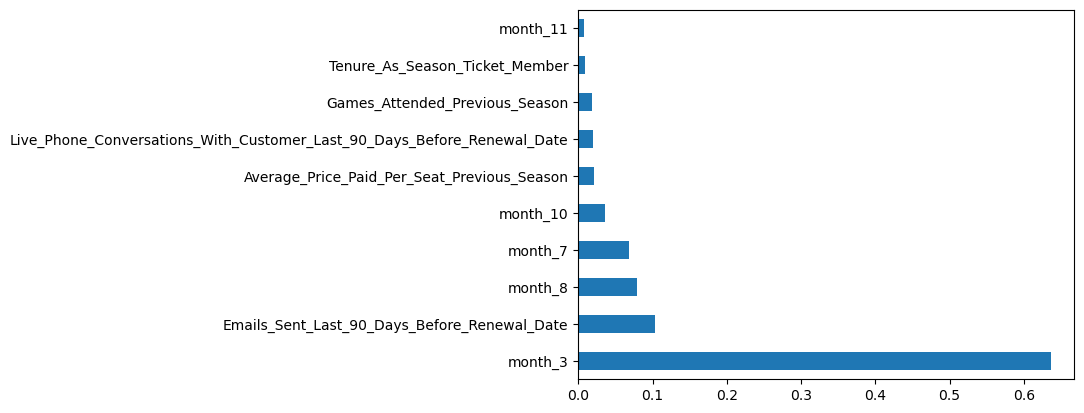

In [1644]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# If not, replace them with the actual column names of your categorical variables
X = df[['Average_Price_Paid_Per_Seat_Previous_Season', 'Total_Seats_Previous_Season', 'Games_Attended_Previous_Season', 
        'Non-Game_Events_Attended_Previous_Season',
        'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date','Emails_Sent_Last_90_Days_Before_Renewal_Date','Zip_Code_Distance_From_Stadium',
        'Tenure_As_Season_Ticket_Member', 'Section_Previous_Season','month']]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Section_Previous_Season', 'month'])

# Target column
y = df['Renewal']

# Use SelectKBest for feature selection
k_best = 10  # Choose the number of top features you want to select
selector = SelectKBest(score_func=f_classif, k=k_best)
X_selected = selector.fit_transform(X_encoded, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X_encoded.columns[selected_indices]

# Print selected feature names
print("Selected Features:", selected_features)

# Initialize and fit the Extra Trees Classifier with the selected features
model = ExtraTreesClassifier()
model.fit(X_selected, y)

# Print feature importances
print("Feature Importances:", model.feature_importances_)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=selected_features)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

SelectKBest technique changed the order of feature importance slightly. The order of price increased to 6 from 7. On the other hand, Games_Attended_Previous_Season drop to 6 from 8.

As you can see, 
1. total seat number
2. Customer’s distance from stadium based on zip code
3. section_previous_season
4. Non-Game_Events_Attended_Previous_Season

are not that important features based on this analysis.

# Model Built Using All Features

This time, I will evaluate a LogisticRegression model using all the available features.
The model is fit on the training dataset and evaluated on the test dataset.

In [1645]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# If not, replace them with the actual column names of your categorical variables
X = df[['Average_Price_Paid_Per_Seat_Previous_Season', 'Total_Seats_Previous_Season', 
        'Non-Game_Events_Attended_Previous_Season',
        'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date','Emails_Sent_Last_90_Days_Before_Renewal_Date','Zip_Code_Distance_From_Stadium',
        'Tenure_As_Season_Ticket_Member', 'Section_Previous_Season','month']]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Section_Previous_Season', 'month'])

# Target column
y = df['Renewal']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.85


I will check if using a subgroup of features with a classification accuracy equivalent to or greater than this accuracy.

### Select K best with ANOVA f-test statistic. selectKBest(score_func=f_classif, k=k_best)

In [1646]:
#Same steps to identify X and Y variable.
# If not, replace them with the actual column names of your categorical variables
X = df[['Average_Price_Paid_Per_Seat_Previous_Season', 'Total_Seats_Previous_Season',  'Games_Attended_Previous_Season', 
        'Non-Game_Events_Attended_Previous_Season',
        'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date','Emails_Sent_Last_90_Days_Before_Renewal_Date','Zip_Code_Distance_From_Stadium',
        'Tenure_As_Season_Ticket_Member', 'Section_Previous_Season', 'month']]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Section_Previous_Season', 'month'])

# Target column
y = df['Renewal']

# Use SelectKBest for feature selection
k_best = 10  # Choose the number of top features you want to select
selector = SelectKBest(score_func=f_classif, k=k_best)
X_selected = selector.fit_transform(X_encoded, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X_encoded.columns[selected_indices]

# Print selected feature names
print("Selected Features:", selected_features)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Selected Features: Index(['Average_Price_Paid_Per_Seat_Previous_Season',
       'Games_Attended_Previous_Season',
       'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date',
       'Emails_Sent_Last_90_Days_Before_Renewal_Date',
       'Tenure_As_Season_Ticket_Member', 'month_3', 'month_7', 'month_8',
       'month_10', 'month_11'],
      dtype='object')
Accuracy: 99.55


We see that accuracy increased to 99.55 from 98.85 when we only use the selected features rather than using the all features in the model.

I tried Select K best with mutual gain(SelectKBest(score_func=mutual_info_classif, k=10) as well). Since the result did not change at all, I did not add it here.

## How do we know that is a good or best number of features to select?
## Tune the number of selected features

In [1647]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# If not, replace them with the actual column names of your categorical variables
X = df[['Average_Price_Paid_Per_Seat_Previous_Season', 'Total_Seats_Previous_Season', 
        'Non-Game_Events_Attended_Previous_Season',
        'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date','Emails_Sent_Last_90_Days_Before_Renewal_Date','Zip_Code_Distance_From_Stadium',
        'Tenure_As_Season_Ticket_Member', 'Section_Previous_Season','month']]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Section_Previous_Season', 'month'])
# Target column
y = df['Renewal']
X_encoded

,Average_Price_Paid_Per_Seat_Previous_Season,Total_Seats_Previous_Season,Non-Game_Events_Attended_Previous_Season,Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date,Emails_Sent_Last_90_Days_Before_Renewal_Date,Zip_Code_Distance_From_Stadium,Tenure_As_Season_Ticket_Member,Section_Previous_Season_Club_Level,Section_Previous_Season_General_Admission,Section_Previous_Season_Platinum_Club,Section_Previous_Season_Reserved_Seats,month_1,month_2,month_3,month_7,month_8,month_9,month_10,month_11,month_12
0,277.44,2,0,0,0,37.556232,1,False,False,False,True,False,False,False,False,False,True,False,False,False
1,308.16,2,4,7,1,15.340993,1,False,False,False,True,False,False,False,True,False,False,False,False,False
2,449.28,1,0,2,12,21.569895,8,False,False,False,True,False,False,False,True,False,False,False,False,False
3,290.88,2,1,4,8,25.821965,4,False,False,False,True,False,False,False,True,False,False,False,False,False
4,449.28,4,4,5,6,16.239354,2,False,False,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,285.60,7,112,4,8,247.023800,1,False,False,False,True,False,False,False,False,True,False,False,False,False
3777,478.80,8,6,0,16,22.418240,7,False,False,False,True,False,False,False,False,True,False,False,False,False
3778,350.88,2,4,3,16,23.187470,2,False,False,False,True,False,False,False,False,True,False,False,False,False
3779,220.32,2,0,1,17,23.642434,1,False,True,False,False,False,False,False,False,True,False,False,False,False


In [1648]:
for k_best in range(1,11):
    selector = SelectKBest(score_func=f_classif, k=k_best)
    X_selected = selector.fit_transform(X_encoded, y)

    # Get the selected feature indices
    selected_indices = selector.get_support(indices=True)

    # Get the selected feature names
    selected_features = X_encoded.columns[selected_indices]
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)
    # fit the model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    # evaluate the model
    yhat = model.predict(X_test)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    print("Selected Features:", selected_features, 'Accuracy: %.2f' % (accuracy*100))# Use SelectKBest for feature selection

Selected Features: Index(['month_3'], dtype='object') Accuracy: 99.55
Selected Features: Index(['Emails_Sent_Last_90_Days_Before_Renewal_Date', 'month_3'], dtype='object') Accuracy: 99.46
Selected Features: Index(['Emails_Sent_Last_90_Days_Before_Renewal_Date', 'month_3', 'month_8'], dtype='object') Accuracy: 99.46
Selected Features: Index(['Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date',
       'Emails_Sent_Last_90_Days_Before_Renewal_Date', 'month_3', 'month_8'],
      dtype='object') Accuracy: 99.46
Selected Features: Index(['Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date',
       'Emails_Sent_Last_90_Days_Before_Renewal_Date', 'month_3', 'month_7',
       'month_8'],
      dtype='object') Accuracy: 99.55
Selected Features: Index(['Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date',
       'Emails_Sent_Last_90_Days_Before_Renewal_Date',
       'Tenure_As_Season_Ticket_Member', 'month_3', 'month_7', 'month_8'],


### We can reached a plateau after 2 selected features, in other words no significant improvement in performance after 2 features.

### Let's visualize and reinforce this argument with forward selection method.

In [1649]:
# Forward Selection: Identify an optimal subset of features for the model.

Selected Features: ('Average_Price_Paid_Per_Seat_Previous_Season', 'Total_Seats_Previous_Season', 'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date', 'Zip_Code_Distance_From_Stadium', 'Tenure_As_Season_Ticket_Member', 'Section_Previous_Season_Club_Level', 'Section_Previous_Season_General_Admission', 'Section_Previous_Season_Platinum_Club', 'Section_Previous_Season_Reserved_Seats', 'month_3')
Accuracy: 0.9942055069714645


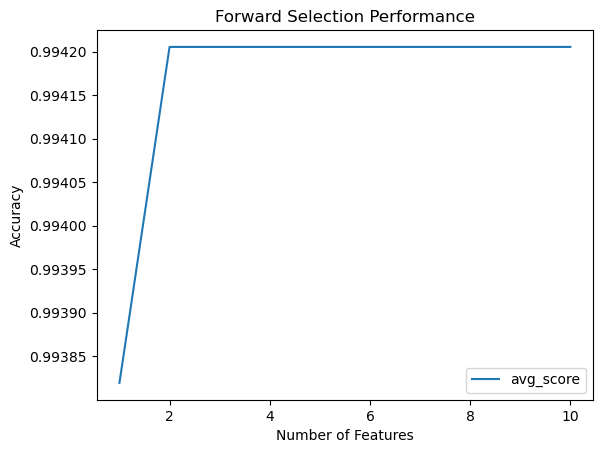

In [1650]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)


# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Define the forward selection object
sfs = SFS(model, k_features=10, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()


### Comparing the different models

In [1651]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te


from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]
    

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]

def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def acc_score_thr(df,label,thr_list):
    Score = pd.DataFrame({"Classifier":classifiers})
    for k in range(len(thr_list)):
        df2 = variance_threshold(df,thr_list[k])
        X_train,X_test,Y_train,Y_test = split(df2,label)
        j = 0
        acc = []
        for i in models:
            model = i
            model.fit(X_train,Y_train)
            predictions = model.predict(X_test)
            acc.append(accuracy_score(Y_test,predictions))
            j = j+1  
        feat = str(thr_list[k])
        Score[feat] = acc
    return Score

        
def plot2(df,l1,l2,p1,p2,c = "b"):
    feat = []
    feat = df.columns.tolist()
    feat = feat[1:]
    plt.figure(figsize = (16, 18))
    for j in range(0,df.shape[0]):
        value = []
        k = 0
        for i in range(1,len(df.columns.tolist())):
            value.append(df.iloc[j][i])
        plt.subplot(4, 4,j+1)
        ax = sns.pointplot(x=feat, y=value,color = c )
        plt.text(p1,p2,df.iloc[j][0])
        plt.xticks(rotation=90)
        ax.set(ylim=(l1,l2))
        k = k+1
        

def highlight_max(data, color='aquamarine'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else: 
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
# Reference code: https://www.kaggle.com/code/tanmayunhale/feature-selection-variance-threshold

In [1652]:
score1 = acc_score(X_encoded, y)
score1

,Classifier,Accuracy
0,LinearSVM,0.991351
1,RandomForest,0.991351
2,AdaBoost,0.991351
3,DecisionTree,0.990270
4,GradientBoosting,0.990270
5,Logistic,0.988108
6,KNeighbors,0.902703
7,RadialSVM,0.869189


AdaBoost ML model gives the highest accuracy score although all accuracy scores are very high.

# Communicate Results

The top features, as indicated by their importance scores, will guide our initial focus. In the subsequent steps, I'll delve into exploring and understanding how these top features are related to the decision of membership renewal. This approach allows us to prioritize and gain insights into the most influential aspects of our data.

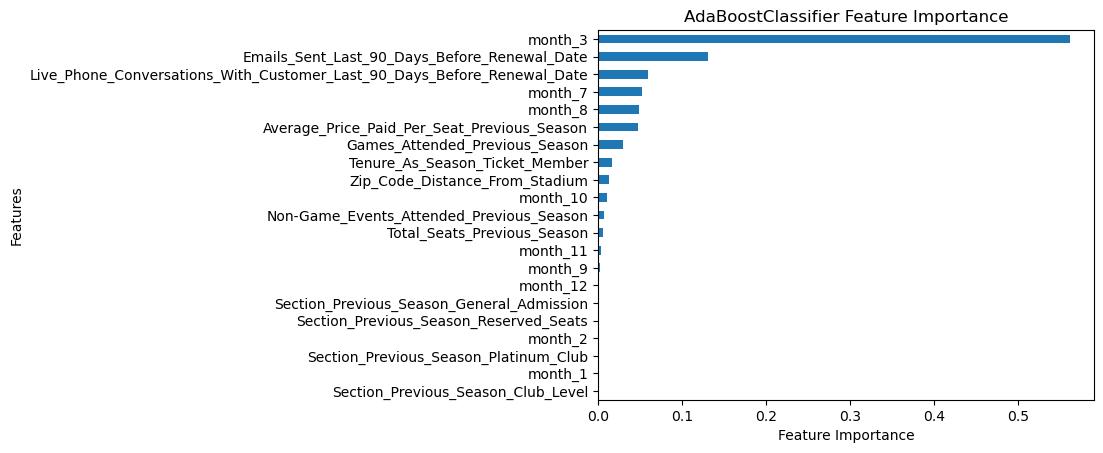

In [1653]:
# Train a random forest classifier
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

# Train an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = adaboost_model.feature_importances_
# Plot a histogram of feature importances
feature_importance_series.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('AdaBoostClassifier Feature Importance')
plt.show()

As part of our feature selection process, we conducted a thorough threshold variance analysis, which revealed insights into the variability of our variables. One notable observation was the 'Team_Win_Pct_Previous_Season' variable, where we found only two distinct winning ratios from seasons 2012 and 2013. Given this limited variability, we decided to exclude this variable from our model, as it is likely to have minimal impact on predicting membership renewals. To further underscore this decision, let's visualize the distribution of winning ratios AND renewal decision across these two seasons to visually demonstrate the limited variation and reinforce our choice to streamline our feature set for enhanced model efficiency and interpretability.

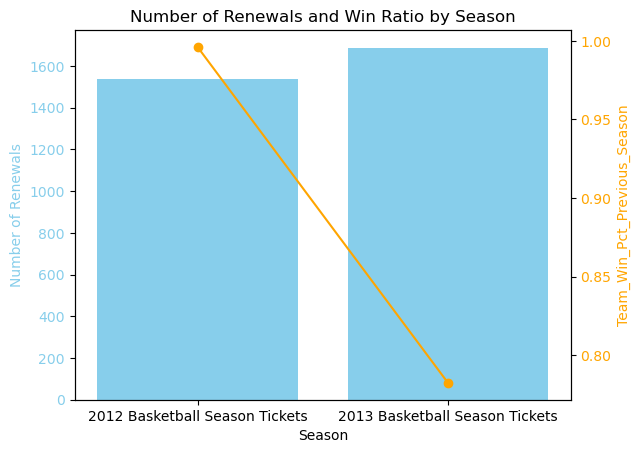

In [1654]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by season and calculate both the number of renewals and the win ratio
season_stats = df.groupby('Previous_Season')['Renewal'].agg(['sum', 'mean'])

# Plot a grouped bar chart
fig, ax1 = plt.subplots()

color = 'skyblue'
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of Renewals', color=color)
ax1.bar(season_stats.index, season_stats['sum'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'orange'
ax2.set_ylabel('Team_Win_Pct_Previous_Season', color=color)
ax2.plot(season_stats.index, season_stats['mean'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Renewals and Win Ratio by Season')
plt.show()

 As you can see the graph in the above, the number of renewals increased in 2013 compared to 2012 regardless of the team winning. It supports to our threshold variance analysis. 

In [1655]:
df.groupby('Previous_Season')['Renewal'].sum()

Previous_Season
2012 Basketball Season Tickets    1537
2013 Basketball Season Tickets    1687
Name: Renewal, dtype: int64

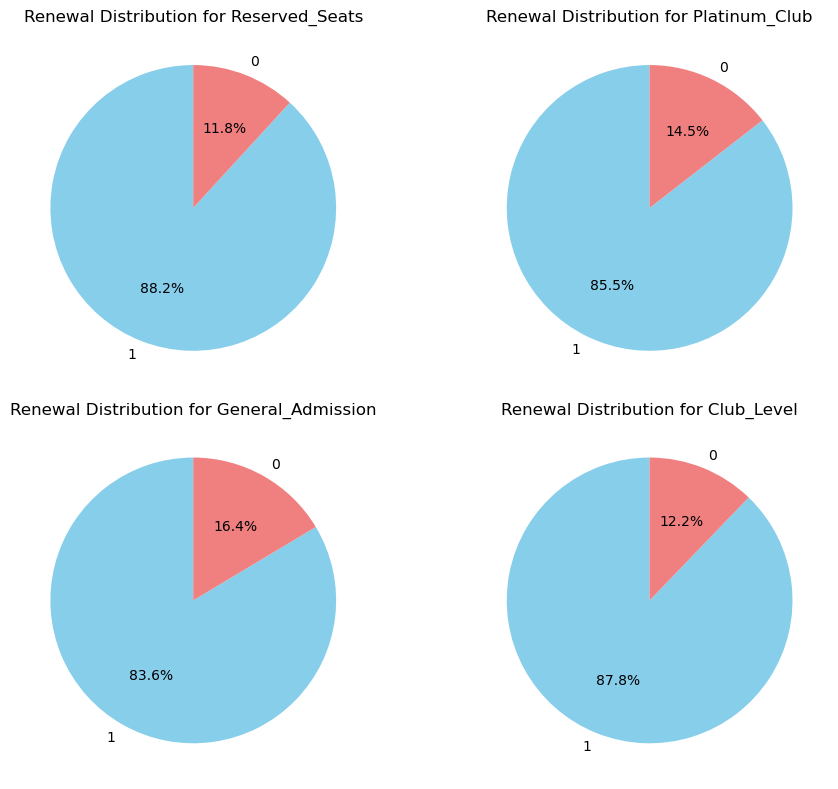

In [1656]:
# Get unique seating categories
seating_categories = df['Section_Previous_Season'].unique()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through each seating category and create a pie chart in the corresponding subplot
for i, seating_category in enumerate(seating_categories):
    ax = axes[i]
    data = df[df['Section_Previous_Season'] == seating_category]['Renewal'].value_counts()
    
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    ax.set_title(f'Renewal Distribution for {seating_category}')

# Adjust layout
plt.tight_layout()
plt.show()

We noticed that General Admission and Platinum Club members are less likely to renew their memberships. Understanding this helps us make specific plans to improve renewal rates for these members. So, I will look at the relationship between Emails_Sent_Last_90_Days_Before_Renewal_Date, Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date and Section_Previous_Season.

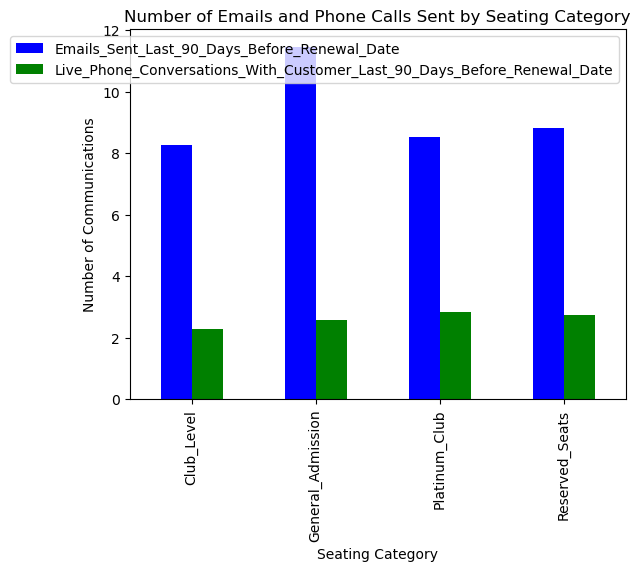

In [1657]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by seating category and calculate the mean number of emails and phone calls
communication_counts = df.groupby('Section_Previous_Season')[['Emails_Sent_Last_90_Days_Before_Renewal_Date', 'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date']].mean()

# Plot a bar chart
communication_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Seating Category')
plt.ylabel('Number of Communications')
plt.title('Number of Emails and Phone Calls Sent by Seating Category')
plt.show()


It's interesting to see that General Admission members receive the highest number of emails, while Platinum Club members receive the highest number of phone calls. 

This suggests our marketing might not be quite right for them. Maybe our emails need to be more personalized, or our phone calls need to be longer to really connect with Platinum Club members. It's a reminder that it's not just about how much we communicate but also how well we do it. Making our messages more personal could really make a difference in getting General Admission and Platinum Club members to renew their memberships.

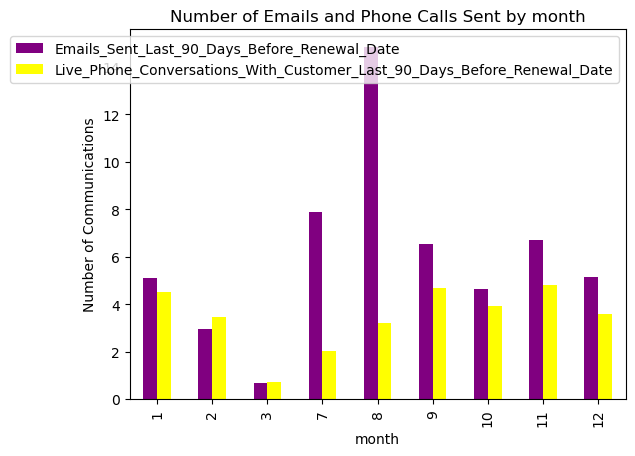

In [1658]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by seating category and calculate the mean number of emails and phone calls
communication_counts = df.groupby('month')[['Emails_Sent_Last_90_Days_Before_Renewal_Date', 'Live_Phone_Conversations_With_Customer_Last_90_Days_Before_Renewal_Date']].mean()

# Plot a bar chart
communication_counts.plot(kind='bar', color=['purple', 'yellow'])
plt.xlabel('month')
plt.ylabel('Number of Communications')
plt.title('Number of Emails and Phone Calls Sent by month')
plt.show()


It's not surprising that we sent the most emails and made the most phone calls (in the last 90 days) during months 7 and 8, and the least in month 3. Recognizing this pattern, our analysis indicates that months 3, 7, and 8 play a crucial role in our model.

This highlights the importance of executing our marketing strategy more intensively during the summer months and the initial three months of the year. By strategically focusing our efforts during these periods, we can maximize the impact of our communication and potentially improve overall membership renewal rates.

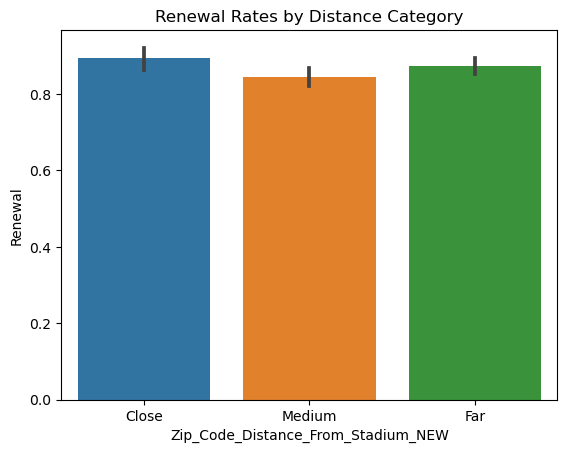

In [1659]:
# Create a categorical column for distance categories
df['Zip_Code_Distance_From_Stadium_NEW'] = pd.cut(df['Zip_Code_Distance_From_Stadium'], bins=[0, 10, 20, 30], labels=['Close', 'Medium', 'Far'])

# Bar plot for renewal rates based on distance categories
sns.barplot(x='Zip_Code_Distance_From_Stadium_NEW', y='Renewal', data=df)
plt.title('Renewal Rates by Distance Category')
plt.show()

It's evident from our analysis that distance doesn't play a significant role in the decision to renew(The customer far from the venue almost have the same renewal rate with the close customers.) The data suggests that customers, regardless of the distance from the venue, are making renewal decisions independently of this factor. This insight allows us to focus on other aspects that might have a more pronounced impact on the renewal decision, guiding our strategies towards areas that are more influential in customer decision-making.

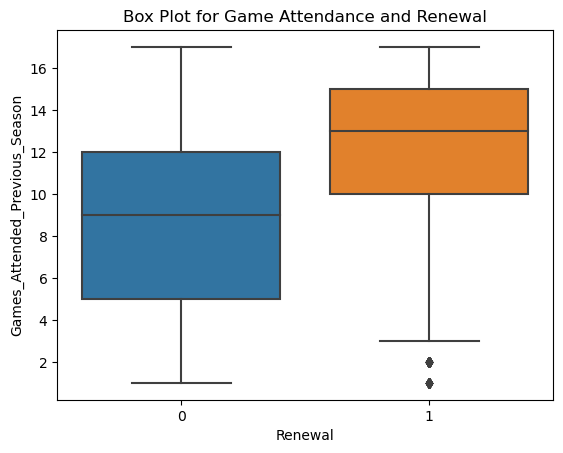

In [1660]:
# Box plot for Game Attendance and Renewal
sns.boxplot(x='Renewal', y='Games_Attended_Previous_Season', data=df)
plt.title('Box Plot for Game Attendance and Renewal')
plt.show()

It's notable in our analysis that customers who attend the game less than 9 times are showing a lower likelihood of membership renewal. This insight suggests a valuable target group for our strategies.

# Operationalize

I suggest we pay more attention to where our fans live(or where they commute for the game) and how they get to the games. Instead of just looking at the distance, let's use zip codes to really understand their neighborhoods and commuting habits, whether they drive, take public transport, or use ride-sharing like Uber or Lyft, maybe with friends. Knowing this, we can think about putting up billboards in the right areas or teaming up with Uber and Lyft on game days. This way, we're being super smart about our marketing, focusing exactly where our fans are and how they like to travel.

Secondly, It looks like just sending a bunch of emails or making many calls doesn't really affect whether people renew. What matters more is making those messages personal. Like asking about their game day experience or sending a special birthday email with free tickets for their friends. So, we'll focus on making our communication more personal to make a better impact on their decision to renew.

Since we only have two years' worth of data on team success, it's challenging to accurately determine if the team's investment is making a noticeable impact on the decision to renew. 

How we talk to fans really matters for renewals. Figuring out how they hear about game days—like through social media, our app, website, or emails—helps us group them better.

Fan experience in arena: Understanding how Platinum and General Admission fans buy stuff like food and clothing at the arena helps us know what they're into. For instance, if they always grab KFC or wear Nike shirts. Knowing these details helps us connect with them better, showing that we understand their preferences and can be helpful in their renewal decision.

Seasonal factor to keep customers engaged with the team(Months): Most importantly,what we do in the summer and the first three months of the year, especially leading up to March, from a marketing perspective. These times seem to be when customers are most responsive. Considering it's winter, going to games or supporting the team in the finals could be a great idea—it's always enjoyable to back your team during these exciting times.

For better analysis, it would be helpful to collect these data points for future studies.
1. I would  keep zip code as categorical variable to see mostly in which area our fans live in rather than distance.
2. Response rate to the emails sent to customer in the last 90 days before renewal/non-renewal date.( Checking if the email is opened or not), 
3. The percantage of team winning on the games who the customer attends (not general team winning in the season)
4. Customer attendance in different times of the season for example how many games the customer attended in the first half and second half or if she/he attended playoffs, seasonality.
5. Duration of phone calls.
6. The time passed until renewal after the last live phone conversation.
7. If the customer is using the app to follow the team updates, details or not(binary).
8. Seating is used by same people or resale option.
9. Gender,age etc.
10. If the email is customized or not- sending customized emails per each customer segmentation and response rate for these emails. Response rate to the customized emails.